In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/opencv-samples-images/hand.jpg
/kaggle/input/opencv-samples-images/house.jpg
/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame.mp4
/kaggle/input/opencv-samples-images/someshapes.jpg
/kaggle/input/opencv-samples-images/Origin_of_Species.jpg
/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame.png
/kaggle/input/opencv-samples-images/scan.jpg
/kaggle/input/opencv-samples-images/minions.jpg
/kaggle/input/opencv-samples-images/waldo.jpg
/kaggle/input/opencv-samples-images/blobs.jpg
/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame_1.png
/kaggle/input/opencv-samples-images/Background-Subtraction-Tutorial_merged.gif
/kaggle/input/opencv-samples-images/Background-Subtraction-Tutorial_merged.mp4
/kaggle/input/opencv-samples-images/WaldoBeach.jpg
/kaggle/input/opencv-samples-images/data/blox.jpg
/kaggle/input/opencv-samples-images/data/chessboard.png
/kaggle/input/opencv-samples-images/data/apple.jpg
/kaggle/input

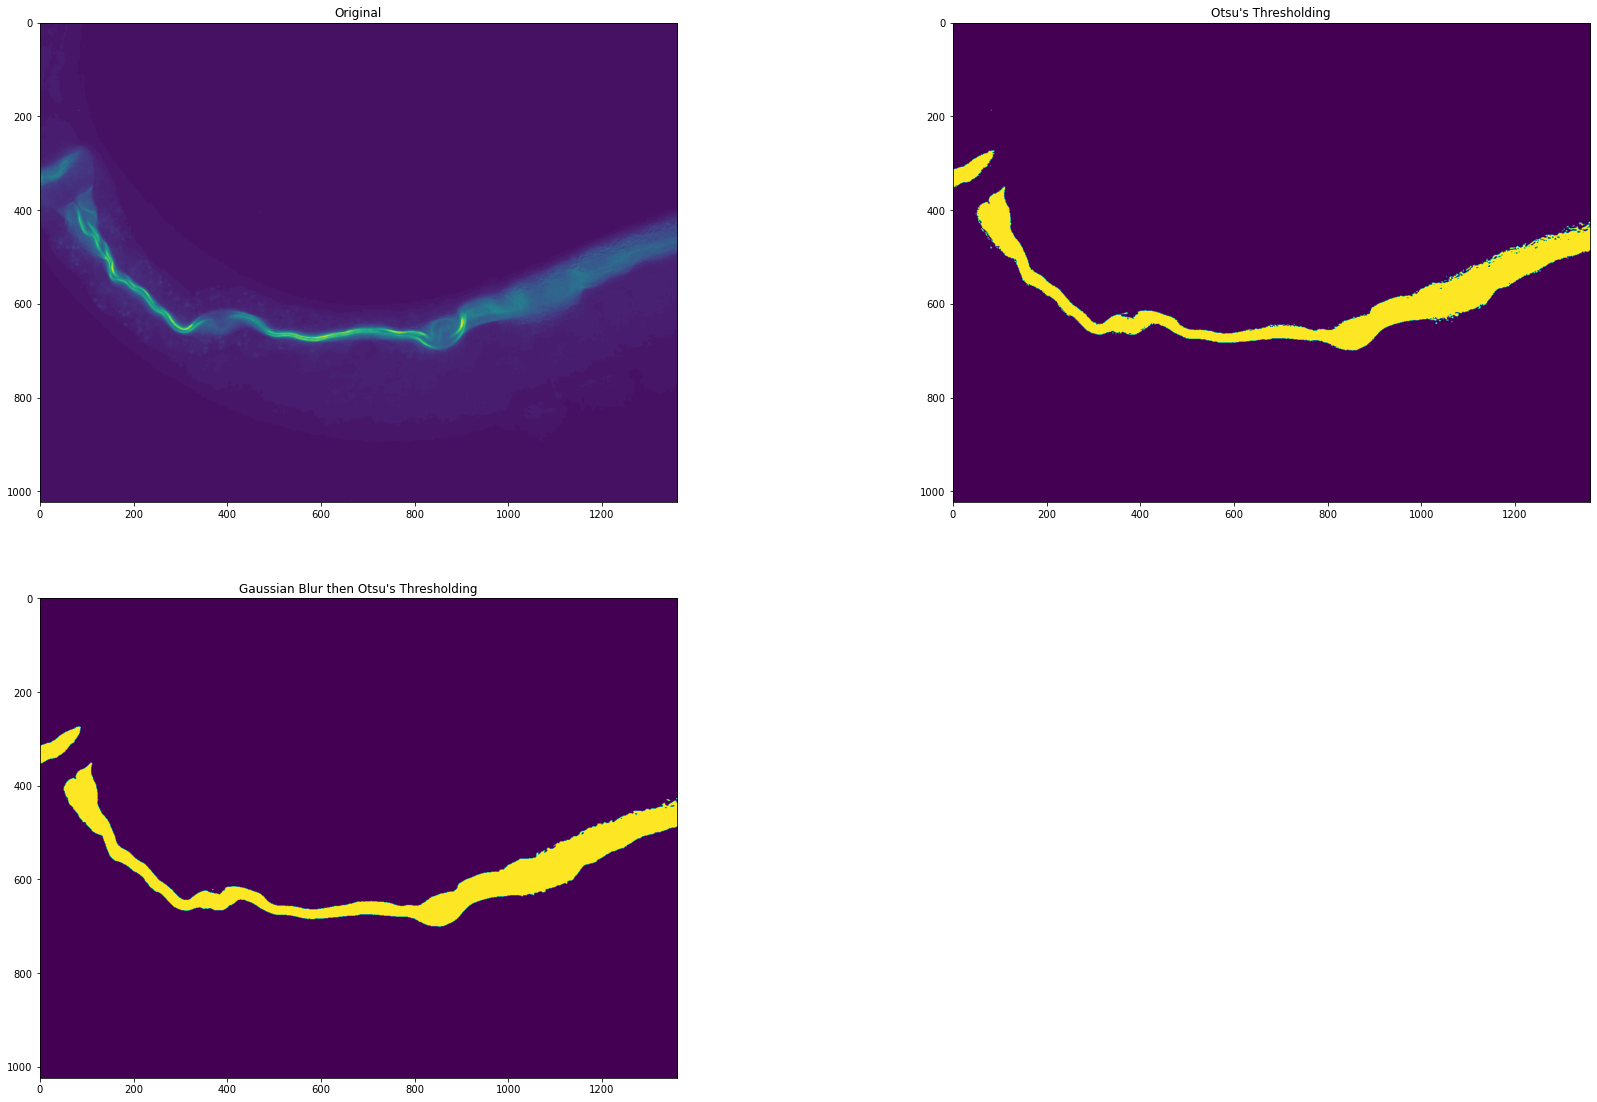

In [2]:
image = cv2.imread('/kaggle/input/vedikaprojecttest/23-01-23_APN017_RNAi_24HRS_L4440_PA14_20X_2b.jpg', 0)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image,  127, 255, cv2.THRESH_BINARY)

# It's good practice to blur images as it removes noise
# image = cv2.GaussianBlur(image, (7, 7), 0)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(3, 2, 2)
plt.title("Otsu's Thresholding")
plt.imshow(th2)


plt.subplot(3, 2, 3)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (7,7), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Gaussian Blur then Otsu's Thresholding")
plt.imshow(th3)
plt.show()

Contours and approximating contours

Number of Contours found = 18


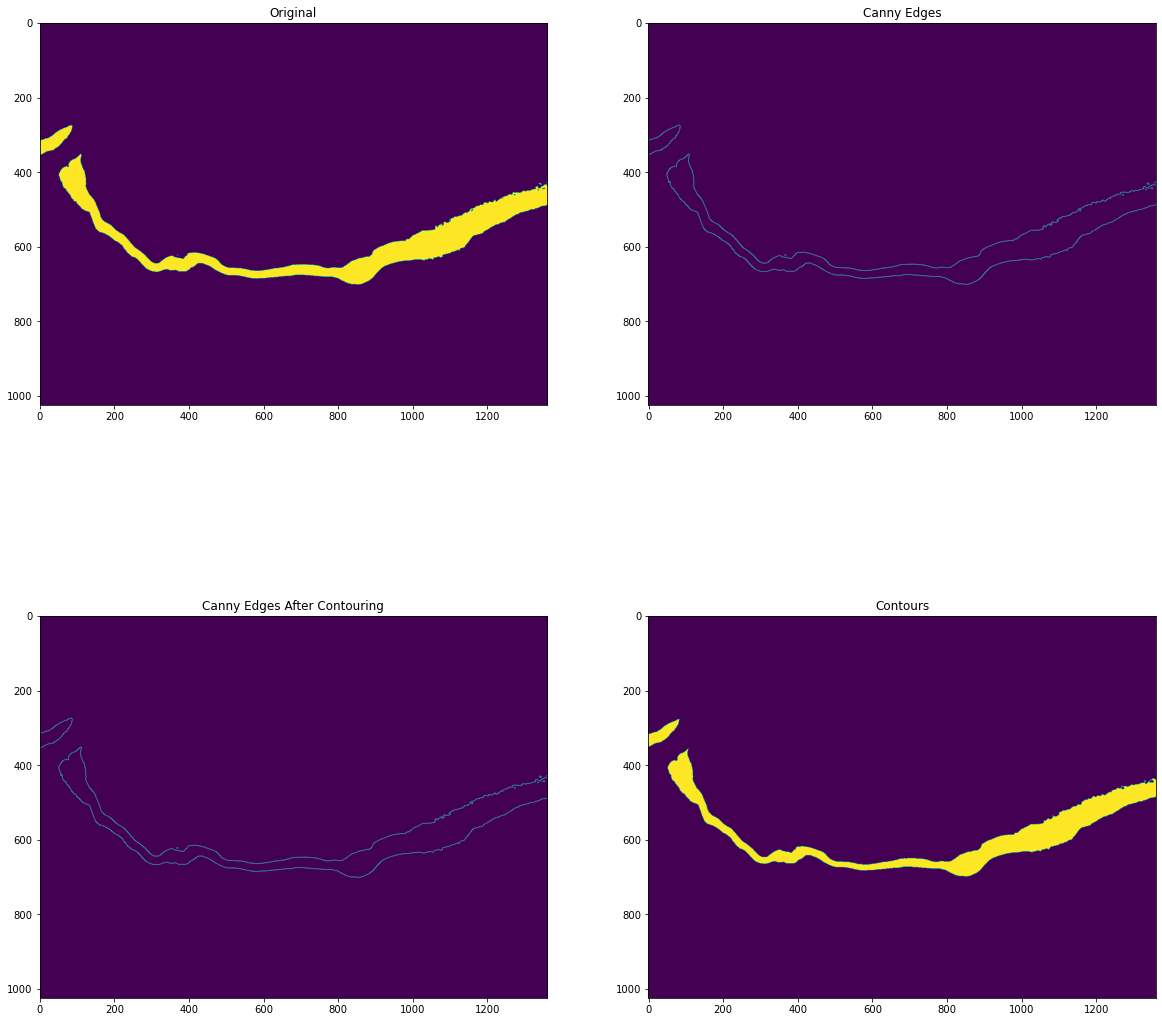

In [3]:
# Let's load a simple image with 3 black squares
# image = cv2.imread('/kaggle/input/vedikaprojecttest/23-01-23_APN017_RNAi_24HRS_L4440_PA14_20X_2b.jpg')
image = th3
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)


# Grayscale
# gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(image, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)


# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

approximating contours

measuring based on conditions